In [1]:
import pandas as pd
df_headbrain = pd.read_csv('headbrain.csv')
df_headbrain

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


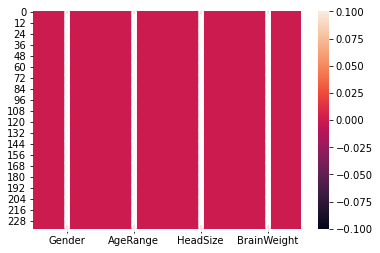

In [2]:
#Lets check whether the null values are present in the dataset or not using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_headbrain.isnull(),annot=True)
plt.show()


In [3]:
#lets check the null vales without using visualisation
df_headbrain.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [4]:
#Lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df_headbrain))
print(df_headbrain.shape)
df_headbrain_final=df_headbrain.loc[(z_score<3).all(axis=1)]
print(df_headbrain_final.shape)

(237, 4)
(236, 4)


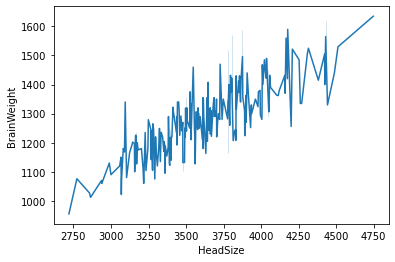

In [8]:
#Lets check the how brain weight(grams) is changing with respect to Head size(cm^3)
sns.lineplot(x=df_headbrain['HeadSize'],y=df_headbrain['BrainWeight'],data=df_headbrain)
plt.show()
#the below graphh clearly shows that with increase in head size their is increase in brain weight too

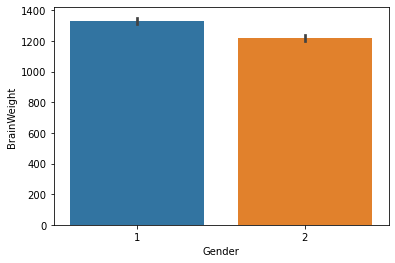

In [12]:
#lets check what is the average brain size according to gender
sns.barplot(x=df_headbrain['Gender'],y=df_headbrain['BrainWeight'],data=df_headbrain)
plt.show()

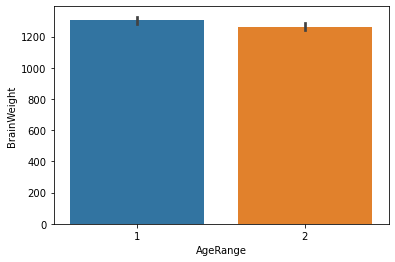

In [16]:
#Now lets check what is the average brain size according to age range
sns.barplot(x=df_headbrain['AgeRange'],y=df_headbrain['BrainWeight'],data=df_headbrain)
plt.show()

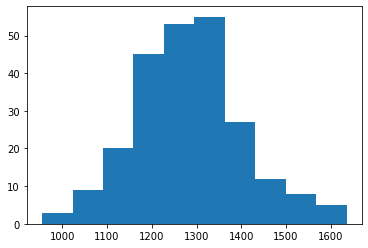

In [17]:
#Lets draw histogram for brain weight
plt.hist(x='BrainWeight',bins=10,data=df_headbrain)
plt.show()

In [23]:
#Lets chek skewness of the dataset
"""NOTE: skewness is lie between -1 >0.5<1"""
df_headbrain.skew()
#Below shows acceptable level of skewness

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

In [31]:
#Now let seprate input and output variable to be used for the linear regression problem
x=df_headbrain[['HeadSize']]   # Here using double brakets """
y=df_headbrain[['BrainWeight']]

In [32]:
#scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)
x


array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to",final_r_state," is ",max_r_score) 
# The belwo output shows that we are getting acceptable level of r2 score in most of the cases and max value is also shown

r2_score corresponding to random state: 42 is: 0.7149168473012075
r2_score corresponding to random state: 43 is: 0.6404165530671617
r2_score corresponding to random state: 44 is: 0.653010968876236
r2_score corresponding to random state: 45 is: 0.6939862623941999
r2_score corresponding to random state: 46 is: 0.5332650244375814
r2_score corresponding to random state: 47 is: 0.6201411206780885
r2_score corresponding to random state: 48 is: 0.6851449361873334
r2_score corresponding to random state: 49 is: 0.6433491336855989
r2_score corresponding to random state: 50 is: 0.7683161771318532
r2_score corresponding to random state: 51 is: 0.5935686929145347
r2_score corresponding to random state: 52 is: 0.6342022687682457
r2_score corresponding to random state: 53 is: 0.5909146568147448
r2_score corresponding to random state: 54 is: 0.6130331905389369
r2_score corresponding to random state: 55 is: 0.5884150240645216
r2_score corresponding to random state: 56 is: 0.7399588791116045
r2_score co

In [42]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()
#the Below cross validation score is less and it shows that we further need to improve out model using more data

0.4936984443261272

In [43]:
#since maximum r2 score is comming around random state 50 we will use that to create our final model
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state = 50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [44]:
#Lets evaluate RMSE and r2 score using sklearn libray
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is:",r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.7683161771318532
RMSE is : 60.36773435476799


In [47]:
#lets save the model using joblib
import joblib
joblib.dump(lr,'lr_headbrain.pkl')

['lr_headbrain.pkl']